# Tutorial 8: Applying a colormap and getting a colorbar

In [1]:
#Import required system libraries for file management
import sys,importlib,os

# Provide path to oct-cbort library
module_path=os.path.abspath('/Users/damondepaoli/Documents/GitHub/oct-cbort')
if module_path not in sys.path:
    sys.path.append(module_path)

# Import oct-cbort library
from oct import *

### As usual, let's load a data directory 

In [2]:
d = os.path.join(module_path,'examples/data/4_BL_Benchtop_Phantom_struct_angio_ps')
data = Load(directory = d)

### ...and process it, with ps enabled.

In [3]:
# Process
processer = Post()
processer.processFrameRange(data, startFrame=1, endFrame=1, procState='struct+angio+ps')

Now lets look at theta

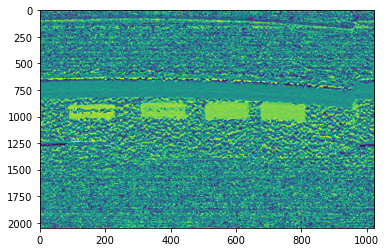

In [4]:
plt.imshow(data.processedData['theta'], aspect='auto')

What we see here is Python's native greyscale color map, what if we try another stock colormap?

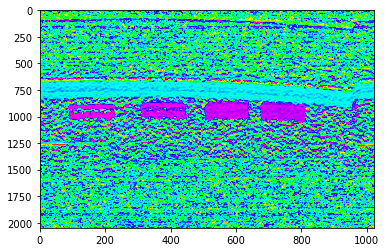

In [5]:
plt.imshow(data.processedData['theta'], cmap='hsv', aspect='auto')

Not bad, but what about other cyclic colormaps? .. and how would we appying weights and masks? ..And If we want to save these as actual frames in RGB, how would we do that?

Use the Colormap class!

In [10]:
color = Colormap()

In [11]:
image = data.processedData['theta'].astype('float32')/255
mask = data.processedData['mask']
weight = data.processedData['struct'].astype('float32')/255

test = color.apply(image, mask=mask, weight=weight, cmap='hsv')

### Take a look at the result:

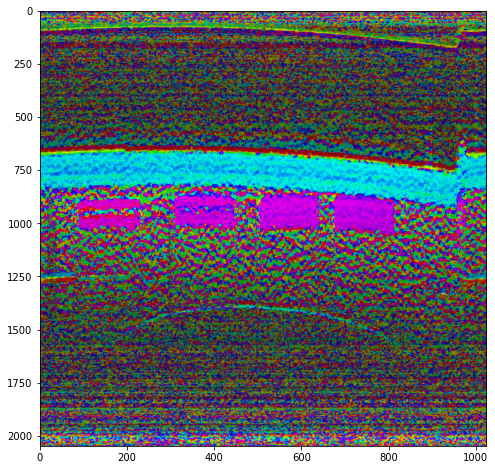

In [38]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(test, aspect='auto')

Not bad, now what if we want the colorbar?

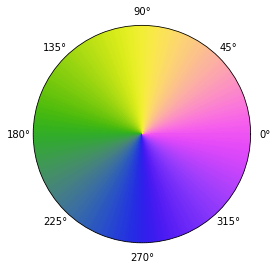

In [39]:
color.showColorBar()

###  This colormap class is indeed what is being used when we invoke 'hsv' as a process state

In [40]:
# Process
processer = Post()
processer.processFrameRange(data, startFrame=1, endFrame=1, procState='struct+angio+ps+hsv')

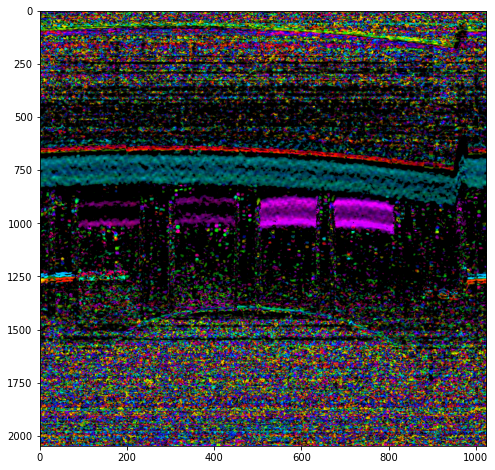

In [41]:
# Notice here that the weight and masking are more complex, and are derived from 
# the settings in the editsettings.ini/reconstructsettings.ini files
fig = plt.figure(figsize=(8, 8))
plt.imshow(data.processedData['hsv'], aspect='auto')

###  There are two other isoluminant and visually corrected colormaps currently , but many more can be added by following the same pattern as is in the class: either using lookup tables, or from installed libraries. Both are included in the Colormap class code for reference

In [42]:
test2 = color.apply(image, mask=mask, weight=weight, cmap='C2')

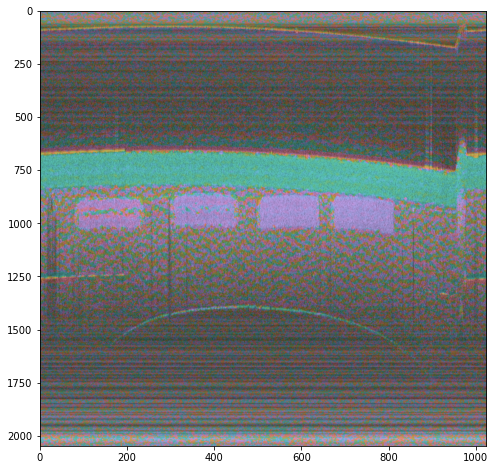

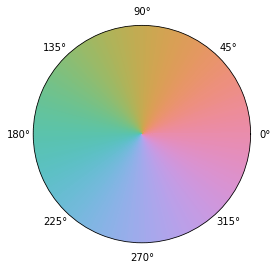

In [43]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(test2, aspect='auto')
color.showColorBar()

In [44]:
test3 = color.apply(image, mask=mask, weight=weight, cmap='CET_C2')

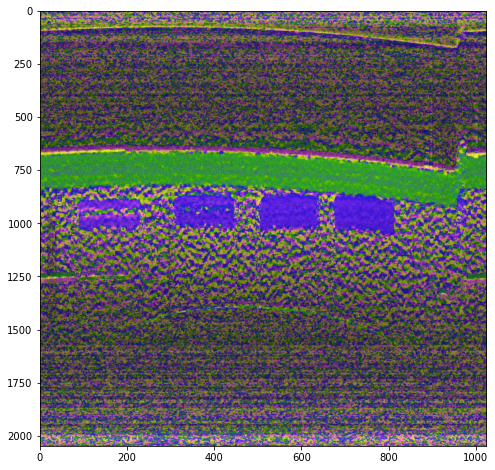

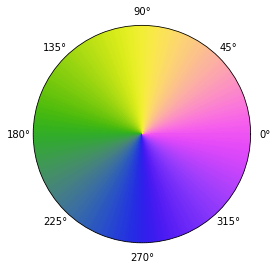

In [45]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(test3, aspect='auto')
color.showColorBar()